In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [5]:
data = pd.read_csv("phishing_email.csv")
data

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


In [6]:
data = data.dropna()


In [7]:
import xgboost
print(xgboost.__version__)

3.1.2


In [8]:
# --- Feature Extraction ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


def prepare_features(dataframe, text_column="text_combined", label_column="label"):
    """
    Convert raw text into TF–IDF vectors and split into train/test sets.
    """

    # Extract inputs and labels
    texts = dataframe[text_column]
    labels = dataframe[label_column]

    # TF-IDF transformer
    vectorizer = TfidfVectorizer(
        max_features=5000,
        stop_words="english"
    )

    features = vectorizer.fit_transform(texts)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=0.2,
        random_state=42
    )

    return X_train, X_test, y_train, y_test, vectorizer


# --- Usage Example ---
X_train, X_test, y_train, y_test, tfidf_model = prepare_features(data)
print(y_test)

30381    0
64974    1
62961    0
81143    1
12064    0
        ..
63774    0
20474    1
46370    1
19181    1
61663    1
Name: label, Length: 16498, dtype: int64


In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Model
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.951206206812947


In [20]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Legitimate", "Phishing"],
        yticklabels=["Legitimate", "Phishing"]
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


def plot_roc(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

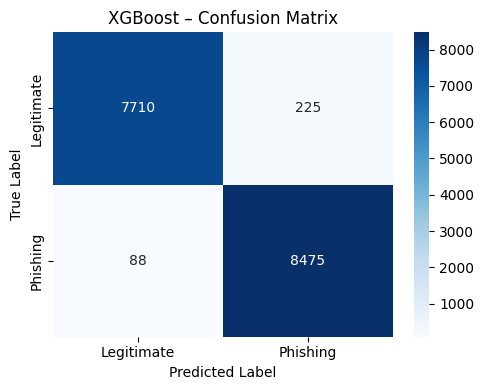

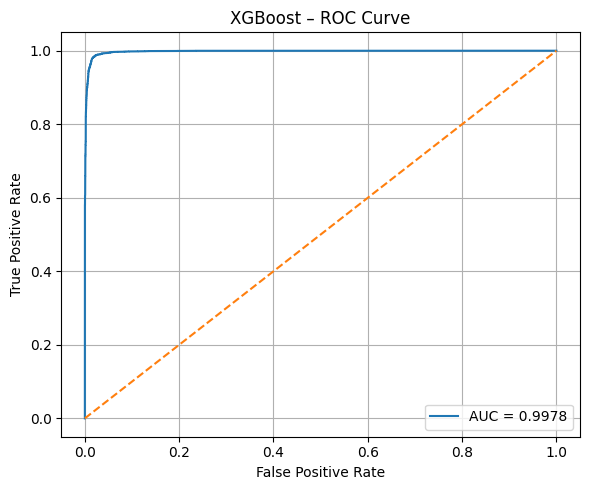

,precision,recall,f1-score,support
Legitimate,0.988715,0.971645,0.980106,7935.000000
Phishing,0.974138,0.989723,0.981869,8563.000000
accuracy,0.981028,0.981028,0.981028,0.981028
macro avg,0.981426,0.980684,0.980987,16498.000000
weighted avg,0.981149,0.981028,0.981021,16498.000000


from matplotlib import pyplot as plt
_df_11['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
y_prob_xgb = model.predict_proba(X_test)[:, 1]


y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

plot_confusion(y_test, y_pred_xgb, "XGBoost – Confusion Matrix")


plot_roc(y_test, y_prob_xgb, "XGBoost – ROC Curve")


report = classification_report(
    y_test,
    y_pred_xgb,
    target_names=["Legitimate", "Phishing"],
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report

In [ ]:

# GPU-enabled XGBoost model
model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    tree_method="hist",  # GPU-compatible in new XGBoost
    device="cuda"
)

# Grid search parameter grid
param_grid = {
    "n_estimators": [100, 200, 280],
    "max_depth": [4, 8, 12],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=1  # important for GPU
)

# Fit grid search
grid.fit(X_train, y_train)

# Print results
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END c

In [15]:
import torch
torch.cuda.is_available()


True

In [16]:
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 26.6 MB/s eta 0:00:00


In [17]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=10,
    task_type='GPU',
    verbose=100

)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

0:	learn: 0.6360124	total: 526ms	remaining: 4m 22s
100:	learn: 0.1363462	total: 34.5s	remaining: 2m 16s
200:	learn: 0.0970793	total: 1m 5s	remaining: 1m 37s
300:	learn: 0.0815793	total: 1m 35s	remaining: 1m 3s
400:	learn: 0.0720716	total: 2m 5s	remaining: 30.9s
499:	learn: 0.0657091	total: 2m 34s	remaining: 0us
Accuracy: 0.9810280033943508


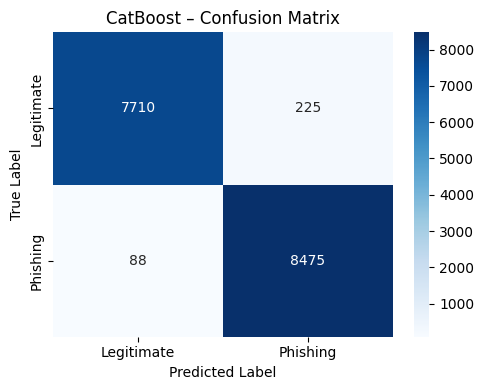

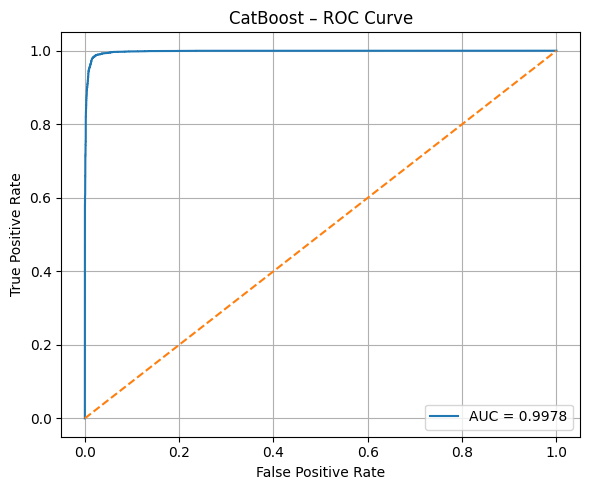

,precision,recall,f1-score,support
Legitimate,0.988715,0.971645,0.980106,7935.000000
Phishing,0.974138,0.989723,0.981869,8563.000000
accuracy,0.981028,0.981028,0.981028,0.981028
macro avg,0.981426,0.980684,0.980987,16498.000000
weighted avg,0.981149,0.981028,0.981021,16498.000000


from matplotlib import pyplot as plt
_df_0['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
# Probability prediction
y_prob_cb = model.predict_proba(X_test)[:, 1]

# Binary prediction
y_pred_cb = (y_prob_cb >= 0.5).astype(int)

plot_confusion(y_test, y_pred_cb, "CatBoost – Confusion Matrix")
plot_roc(y_test, y_prob_cb, "CatBoost – ROC Curve")


report = classification_report(
    y_test,
    y_pred_xgb,
    target_names=["Legitimate", "Phishing"],
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
        self.drop = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.drop(x)
        x = torch.relu(self.fc2(x))
        return torch.sigmoid(self.out(x))


In [29]:
# Sparse → Dense
X_train_dense = X_train.toarray()  # Əgər X_train sparse matrixdirsə
X_test_dense = X_test.toarray()

# PyTorch tensor yaratmaq
X_train_t = torch.tensor(X_train_dense, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_dense, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
print(X_train_t)

tensor([[0.0628, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2097, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [32]:
# X_train_t = torch.tensor(X_train, dtype=torch.float32)
# y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
model = NeuralNet(X_train_t.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



for epoch in range(300):
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.6923
Epoch 10, Loss: 0.6694
Epoch 20, Loss: 0.6239
Epoch 30, Loss: 0.5429
Epoch 40, Loss: 0.4209
Epoch 50, Loss: 0.2860
Epoch 60, Loss: 0.1835
Epoch 70, Loss: 0.1235
Epoch 80, Loss: 0.0922
Epoch 90, Loss: 0.0745
Epoch 100, Loss: 0.0638
Epoch 110, Loss: 0.0555
Epoch 120, Loss: 0.0496
Epoch 130, Loss: 0.0452
Epoch 140, Loss: 0.0412
Epoch 150, Loss: 0.0375
Epoch 160, Loss: 0.0348
Epoch 170, Loss: 0.0318
Epoch 180, Loss: 0.0293
Epoch 190, Loss: 0.0272
Epoch 200, Loss: 0.0256
Epoch 210, Loss: 0.0240
Epoch 220, Loss: 0.0220
Epoch 230, Loss: 0.0210
Epoch 240, Loss: 0.0194
Epoch 250, Loss: 0.0182
Epoch 260, Loss: 0.0171
Epoch 270, Loss: 0.0160
Epoch 280, Loss: 0.0151
Epoch 290, Loss: 0.0142


In [33]:
with torch.no_grad():
    y_pred_prob = model(X_train_t)
    y_pred = (y_pred_prob >= 0.5).float()
    correct = (y_pred == y_train_t).sum().item()
    total = y_train_t.size(0)
    accuracy = correct / total
    print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.9972


In [34]:
model.eval()
with torch.no_grad():
    y_prob_nn = model(X_test_t).numpy().flatten()

y_pred_nn = (y_prob_nn >= 0.5).astype(int)


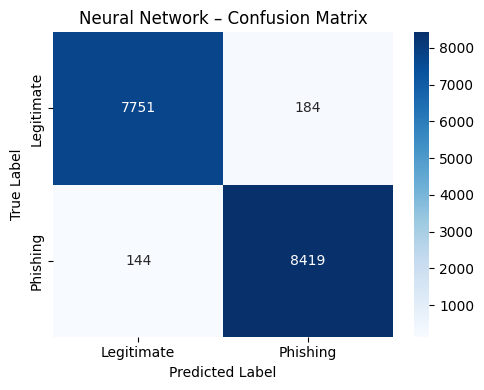

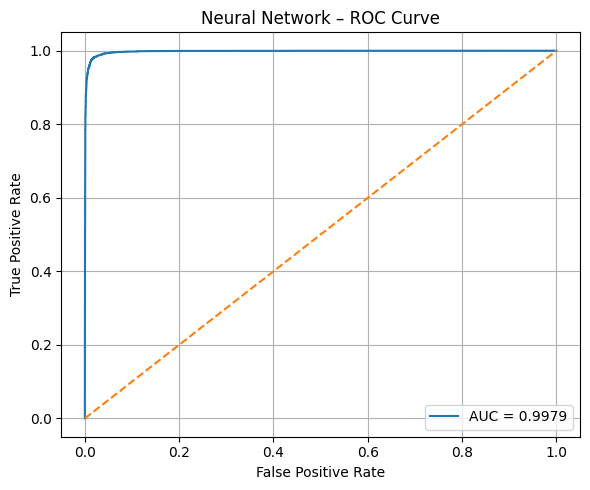

,precision,recall,f1-score,support
Legitimate,0.988715,0.971645,0.980106,7935.000000
Phishing,0.974138,0.989723,0.981869,8563.000000
accuracy,0.981028,0.981028,0.981028,0.981028
macro avg,0.981426,0.980684,0.980987,16498.000000
weighted avg,0.981149,0.981028,0.981021,16498.000000


from matplotlib import pyplot as plt
df_report['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
plot_confusion(y_test, y_pred_nn, "Neural Network – Confusion Matrix")
plot_roc(y_test, y_prob_nn, "Neural Network – ROC Curve")


report = classification_report(
    y_test,
    y_pred_xgb,
    target_names=["Legitimate", "Phishing"],
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report
